<a href="https://colab.research.google.com/github/rifadukrifat-0035/Test-class/blob/main/%5BMod_8%5D_Project_05_Image_Classification_with_NN_vs_CNN_(Fashion_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step-01:** Improts & Setup

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import random

**For reproducibility**

In [5]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [7]:
print("Tensorflow version:", tf.__version__ )
print("GPU Available:", tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Step-02 : Load Dataset

In [9]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape :", x_test.shape, "y_test shape :", y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape : (10000, 28, 28) y_test shape : (10000,)


# Normalize pixel values

In [11]:
# Normalize pixel values [0,1]
x_train = x_train/255.0
x_test = x_test/255.0

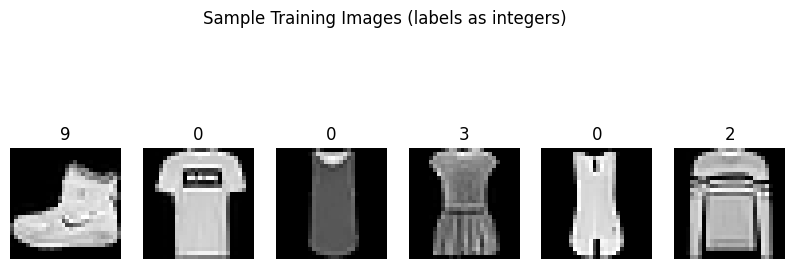

In [12]:


plt.figure(figsize=(10,4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[i]))
plt.suptitle("Sample Training Images (labels as integers)")
plt.show()

# **Step -03: Preprocessing**

In [13]:
# Flatten for NN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat  = x_test.reshape(-1, 28*28)

# Reshape for CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn  = x_test.reshape(-1, 28, 28, 1)

# Class names for labels
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
print("x_train_flat shape:", x_train_flat.shape)
print("x_train_cnn shape :", x_train_cnn.shape)


x_train_flat shape: (60000, 784)
x_train_cnn shape : (60000, 28, 28, 1)


# **Step-04: Build Neural Network (NN)**

In [15]:
nn_model = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

print("NN model summary:")
nn_model.summary()

NN model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## **Step-05: Train Neural Network (NN)**

In [16]:
history_nn = nn_model.fit(
    x_train_flat, y_train,
    epochs=10,
    validation_data=(x_test_flat, y_test),
    batch_size=128,
    verbose=2
)


Epoch 1/10
469/469 - 5s - 12ms/step - accuracy: 0.5768 - loss: 1.2532 - val_accuracy: 0.7135 - val_loss: 0.7978
Epoch 2/10
469/469 - 1s - 3ms/step - accuracy: 0.7493 - loss: 0.6899 - val_accuracy: 0.7615 - val_loss: 0.6482
Epoch 3/10
469/469 - 1s - 3ms/step - accuracy: 0.7784 - loss: 0.6020 - val_accuracy: 0.7802 - val_loss: 0.5988
Epoch 4/10
469/469 - 1s - 3ms/step - accuracy: 0.7970 - loss: 0.5598 - val_accuracy: 0.7912 - val_loss: 0.5679
Epoch 5/10
469/469 - 1s - 3ms/step - accuracy: 0.8084 - loss: 0.5295 - val_accuracy: 0.8033 - val_loss: 0.5444
Epoch 6/10
469/469 - 1s - 3ms/step - accuracy: 0.8182 - loss: 0.5050 - val_accuracy: 0.8124 - val_loss: 0.5242
Epoch 7/10
469/469 - 1s - 3ms/step - accuracy: 0.8262 - loss: 0.4844 - val_accuracy: 0.8172 - val_loss: 0.5072
Epoch 8/10
469/469 - 1s - 3ms/step - accuracy: 0.8326 - loss: 0.4672 - val_accuracy: 0.8220 - val_loss: 0.4938
Epoch 9/10
469/469 - 1s - 2ms/step - accuracy: 0.8374 - loss: 0.4528 - val_accuracy: 0.8258 - val_loss: 0.4827


# **Step-01: Build Convolutional Neural Network (CNN)**

In [17]:
cnn_model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("CNN model summary:")
cnn_model.summary()

CNN model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

# **Step-02: Train Convolutional Neural Network (CNN)n**

In [18]:
history_cnn = cnn_model.fit(
    x_train_cnn, y_train,
    epochs=10,
    validation_data=(x_test_cnn, y_test),
    batch_size=128,
    verbose=2
)

Epoch 1/10
469/469 - 9s - 18ms/step - accuracy: 0.5802 - loss: 1.1971 - val_accuracy: 0.7019 - val_loss: 0.7967
Epoch 2/10
469/469 - 2s - 4ms/step - accuracy: 0.7260 - loss: 0.7374 - val_accuracy: 0.7375 - val_loss: 0.7105
Epoch 3/10
469/469 - 2s - 4ms/step - accuracy: 0.7472 - loss: 0.6779 - val_accuracy: 0.7536 - val_loss: 0.6684
Epoch 4/10
469/469 - 2s - 4ms/step - accuracy: 0.7619 - loss: 0.6374 - val_accuracy: 0.7660 - val_loss: 0.6338
Epoch 5/10
469/469 - 2s - 4ms/step - accuracy: 0.7751 - loss: 0.6027 - val_accuracy: 0.7796 - val_loss: 0.6012
Epoch 6/10
469/469 - 2s - 4ms/step - accuracy: 0.7882 - loss: 0.5718 - val_accuracy: 0.7918 - val_loss: 0.5716
Epoch 7/10
469/469 - 2s - 5ms/step - accuracy: 0.7987 - loss: 0.5449 - val_accuracy: 0.8008 - val_loss: 0.5477
Epoch 8/10
469/469 - 2s - 4ms/step - accuracy: 0.8080 - loss: 0.5221 - val_accuracy: 0.8090 - val_loss: 0.5279
Epoch 9/10
469/469 - 2s - 4ms/step - accuracy: 0.8155 - loss: 0.5024 - val_accuracy: 0.8175 - val_loss: 0.5109


# **Evaluate Models**

In [19]:
nn_loss, nn_acc = nn_model.evaluate(x_test_flat, y_test, verbose=0)
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)

print(f"NN Test Accuracy  : {nn_acc:.4f}")
print(f"CNN Test Accuracy : {cnn_acc:.4f}")

NN Test Accuracy  : 0.8284
CNN Test Accuracy : 0.8220


# **Sample Predictions**

NN Predictions:


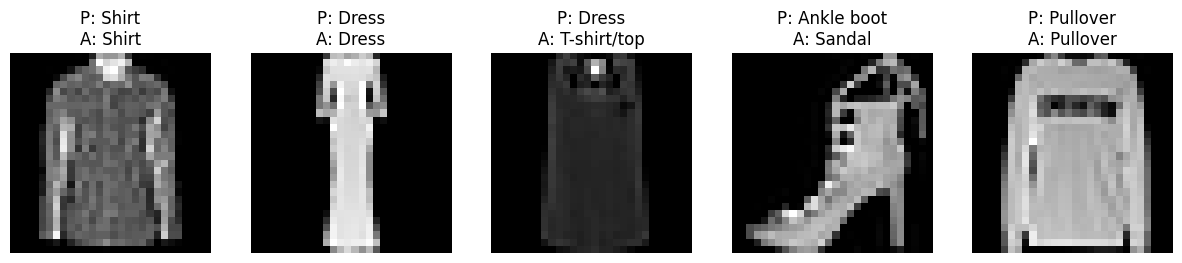

CNN Predictions:


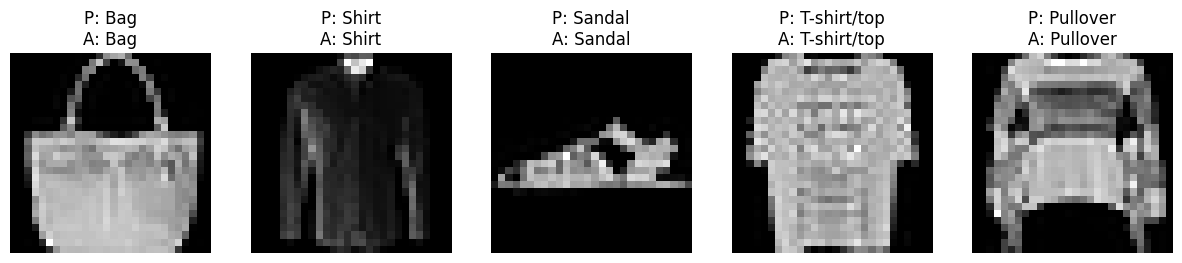

In [20]:
def plot_predictions(model, x_images, x_input, y_true, class_names, num=5):
    indices = np.random.choice(len(x_input), num, replace=False)
    plt.figure(figsize=(15,3))
    for i, idx in enumerate(indices):
        plt.subplot(1, num, i+1)
        if x_input.ndim == 2:  # NN input
            inp = x_input[idx].reshape(1, -1)
        else:                  # CNN input
            inp = x_input[idx].reshape(1, x_input.shape[1], x_input.shape[2], x_input.shape[3])
        pred = model.predict(inp, verbose=0)
        predicted = np.argmax(pred)
        img = x_images[idx]
        if img.ndim == 3: img = img.squeeze()
        plt.imshow(img, cmap='gray')
        plt.title(f"P: {class_names[predicted]}\nA: {class_names[y_true[idx]]}")
        plt.axis('off')
    plt.show()

print("NN Predictions:")
plot_predictions(nn_model, x_test, x_test_flat, y_test, class_names, num=5)

print("CNN Predictions:")
plot_predictions(cnn_model, x_test, x_test_cnn, y_test, class_names, num=5)

# **Step 9: Plot Training History**

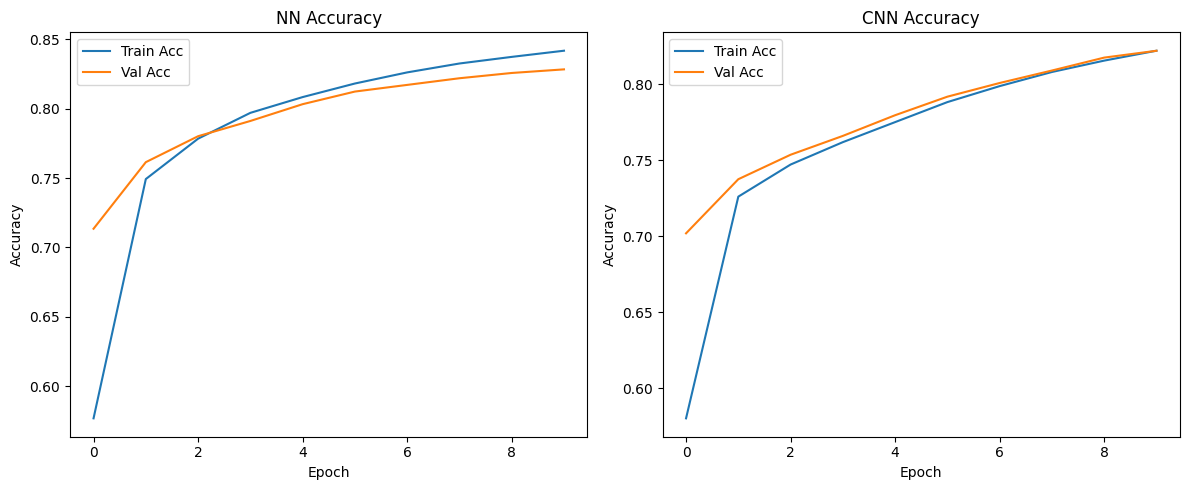

In [21]:
plt.figure(figsize=(12,5))

# NN
plt.subplot(1,2,1)
plt.plot(history_nn.history['accuracy'], label='Train Acc')
plt.plot(history_nn.history['val_accuracy'], label='Val Acc')
plt.title("NN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# CNN
plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.title("CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# **Final Comparison**

In [22]:
print(f"Final NN Accuracy  : {nn_acc:.4f}")
print(f"Final CNN Accuracy : {cnn_acc:.4f}")
print(f"Difference (CNN - NN): {cnn_acc - nn_acc:.4f}")

if cnn_acc > nn_acc:
    print("Conclusion: CNN performed better because it captures spatial patterns in images.")
else:
    print("Conclusion: NN performed better (unusual, may require tuning).")

Final NN Accuracy  : 0.8284
Final CNN Accuracy : 0.8220
Difference (CNN - NN): -0.0064
Conclusion: NN performed better (unusual, may require tuning).
